In [ ]:
from sklearn.model_selection import train_test_split
# model_selection -->
# train_test_split--> cross validation
# Leaky               no need validation sets
# “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

# Tuning parameters
# Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.
# A search consists of:
# an estimator (regressor or classifier such as sklearn.svm.SVC());
# + a parameter space;
# + a method for searching or sampling candidates;
# + a cross-validation scheme; and
# + a score function.

# Intuitively, precision is the ability of the classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to find all the positive samples.
# The F-measure (F_\beta and F_1 measures) can be interpreted as a weighted harmonic mean of the precision and recall.

# Models
# Define Classifier
# For each classifier, apply 'fit(X_train, Y_train)'
# To obtain prediction, apply 'predict(X)'
# To draw decision boundary, apply 'decision_function(X)' or 'predict_proba(X)'

# Evaluation
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, threshold = precision_recall_curve(y_true, y_scores)
average_precision_score(y_true, y_scores)

In [50]:
import pandas as pd

input_file='all_normalized.csv'

df = pd.read_csv(input_file)
df_x = df.iloc[:,[3,4,5,6,7]]
df_y = df.iloc[:,2]
import numpy as np

X = np.array(df_x)#np.ndarray()
Y = np.array(df_y)#np.ndarray()

from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X,Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

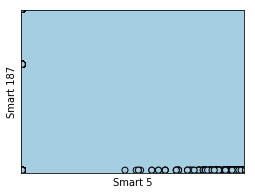

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
h = 1
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Smart 5')
plt.ylabel('Smart 187')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, Y)

In [59]:
print("Accuracy: %0.9f (+/- %0.9f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.999948849 (+/- 0.000000001)


In [62]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import recall_score
predicted = cross_val_predict(logreg, X, Y, cv=10)
metrics.accuracy_score(Y, predicted) 

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.9999488485234274

In [69]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=.3)

In [70]:
y_test.size

52785

In [71]:
from sklearn import svm
classifier = svm.LinearSVC()
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [73]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.9f}'.format(
      average_precision))

Average precision-recall score: 0.000019347


Text(0.5,1,'2-class Precision-Recall curve: AUC=0.000019347')

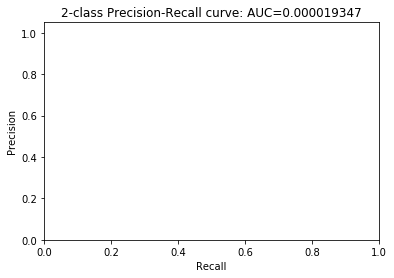

In [75]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.00000001,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.00000001,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.9f}'.format(
          average_precision))